## Binomial Logistic Regression

In [1]:
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import math

### Exploratory Data Analyst

In [2]:
cwd = os.getcwd()
file_folder = 'raw_data'
file_name = 'activity.csv'

file_path = os.path.join(cwd,file_folder,file_name)

raw_data = pd.read_csv(file_path)

raw_data.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [3]:
raw_data.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [12]:
x = raw_data[['Acc (vertical)']]
y = raw_data[['LyingDown']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [5]:
logistic_regression = LogisticRegression().fit(x, y)

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
logistic_regression.coef_

array([[-0.13088164]])

In [7]:
logistic_regression.intercept_

array([6.74388377])

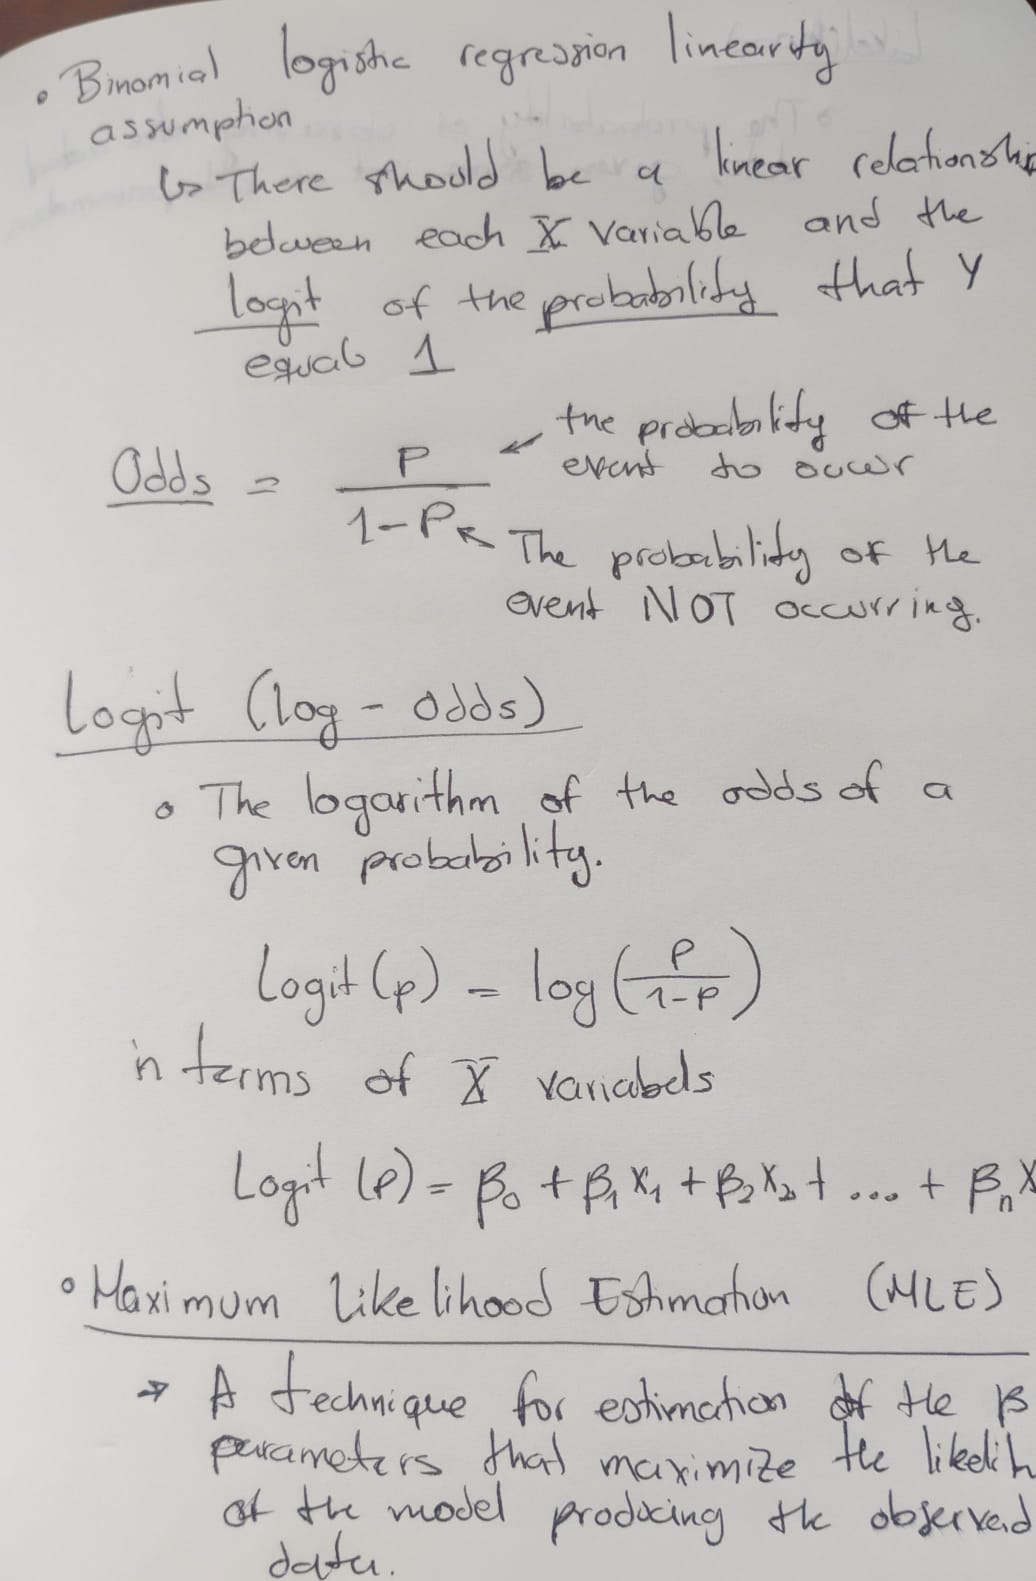 

Logit(P) = b0 + b1x1

logit(P) = 6.7439 + (-0.1309)(x1)

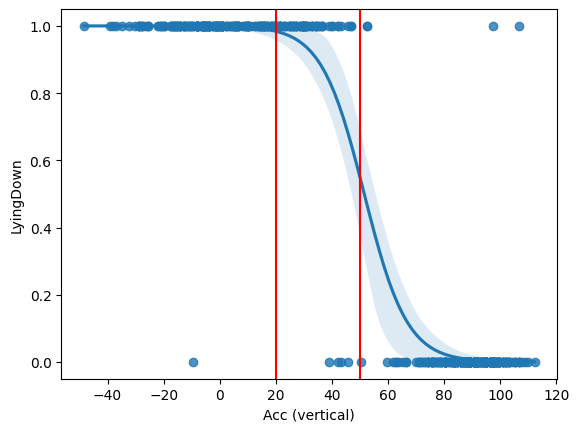

In [8]:
sns.regplot(
    data = raw_data,
    x = 'Acc (vertical)',
    y = 'LyingDown',
    logistic= True
)

plt.axvline(20,color= 'red')
plt.axvline(50,color= 'red')

In [9]:
acc_data = x.join(y,how='inner')
acc_data.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [10]:
def lying_prediction(row):
    pred = math.exp(6.77439 + ((-0.1309)*(row['Acc (vertical)'])))
    if pred >= 1:
        return 1
    else:
        return 0

acc_data['Lying_Down_Manual_pred'] = acc_data.apply(lying_prediction,axis=1)
acc_data['Prediction_check'] = acc_data['LyingDown'] - acc_data['Lying_Down_Manual_pred']
acc_data[acc_data['Prediction_check'] != 0]

,Acc (vertical),LyingDown,Lying_Down_Manual_pred,Prediction_check
7,45.7030,0,1,-1
150,43.4060,0,1,-1
170,106.5600,1,0,1
222,38.8130,0,1,-1
230,-9.4162,0,1,-1
236,97.3770,1,0,1
321,50.2960,0,1,-1
390,52.5930,1,0,1
449,52.5930,1,0,1
453,42.2580,0,1,-1


In [16]:
acc_test = x_test.join(y_test,how='inner')
acc_test.reset_index(inplace=True,drop=True)

In [19]:
acc_test['LyingDown_pred_m'] = acc_test.apply(lying_prediction,axis=1)
acc_test['LyingDown_pred'] = logistic_regression.predict(x_test)
acc_test['prediction_check'] = acc_test['LyingDown'] - acc_test['LyingDown_pred']
acc_test['prediction_comparation'] = acc_test['LyingDown_pred'] - acc_test['LyingDown_pred_m']

acc_prediction_check = acc_test[acc_test['prediction_check'] != 0]
acc_prediction_comparation = acc_test[acc_test['prediction_comparation'] != 0]

In [20]:
acc_prediction_check

,Acc (vertical),LyingDown,LyingDown_pred_m,LyingDown_pred,prediction_check,prediction_comparation
16,52.593,1,0,0,1,0
102,38.813,0,1,1,-1,0
122,50.296,0,1,1,-1,0


In [21]:
acc_prediction_comparation

,Acc (vertical),LyingDown,LyingDown_pred_m,LyingDown_pred,prediction_check,prediction_comparation


In [ ]:
logistic_regression.predict_proba(x_test)

array([[9.85188496e-01, 1.48115043e-02],
       [1.32681088e-03, 9.98673189e-01],
       [9.93935398e-01, 6.06460195e-03],
       [9.99526273e-01, 4.73726965e-04],
       [8.88095929e-05, 9.99911190e-01],
       [9.93935398e-01, 6.06460195e-03],
       [9.97529787e-01, 2.47021255e-03],
       [2.41779821e-03, 9.97582202e-01],
       [1.94854223e-02, 9.80514578e-01],
       [9.85188496e-01, 1.48115043e-02],
       [1.14187392e-03, 9.98858126e-01],
       [9.91826890e-01, 8.17311028e-03],
       [9.76944861e-01, 2.30551385e-02],
       [2.41779821e-03, 9.97582202e-01],
       [5.38920067e-04, 9.99461080e-01],
       [9.58727171e-01, 4.12728286e-02],
       [5.34837060e-01, 4.65162940e-01],
       [9.96666766e-01, 3.33323370e-03],
       [6.26263529e-04, 9.99373736e-01],
       [4.40182377e-03, 9.95598176e-01],
       [9.73306772e-01, 2.66932280e-02],
       [5.38472145e-02, 9.46152786e-01],
       [2.61406384e-02, 9.73859362e-01],
       [9.90513146e-01, 9.48685437e-03],
       [1.077652

In [31]:
logistic_regression.predict_proba(x_test)[:,-1]

array([1.48115043e-02, 9.98673189e-01, 6.06460195e-03, 4.73726965e-04,
       9.99911190e-01, 6.06460195e-03, 2.47021255e-03, 9.97582202e-01,
       9.80514578e-01, 1.48115043e-02, 9.98858126e-01, 8.17311028e-03,
       2.30551385e-02, 9.97582202e-01, 9.99461080e-01, 4.12728286e-02,
       4.65162940e-01, 3.33323370e-03, 9.99373736e-01, 9.95598176e-01,
       2.66932280e-02, 9.46152786e-01, 9.73859362e-01, 9.48685437e-03,
       9.89223477e-01, 7.04091603e-03, 7.70844769e-01, 8.92339306e-01,
       2.30551385e-02, 9.94887503e-01, 1.10080004e-02, 7.04091603e-03,
       9.98458338e-01, 1.71716171e-02, 9.99461080e-01, 7.04091603e-03,
       9.46152786e-01, 9.97191202e-01, 9.17991568e-01, 9.37964265e-01,
       6.32977958e-02, 9.99838006e-01, 7.04091603e-03, 8.19612227e-01,
       2.86955198e-03, 8.17311028e-03, 1.99002015e-02, 1.82999031e-03,
       2.12605074e-03, 7.04091603e-03, 9.99461080e-01, 4.76454599e-02,
       2.12605074e-03, 9.99461080e-01, 5.22227438e-03, 9.65012177e-01,
      

## Create a confusion Matrix

**Confusion matrix:** A graphical representation of how accurate a classifier is at predicting the labels for a categorical variable.

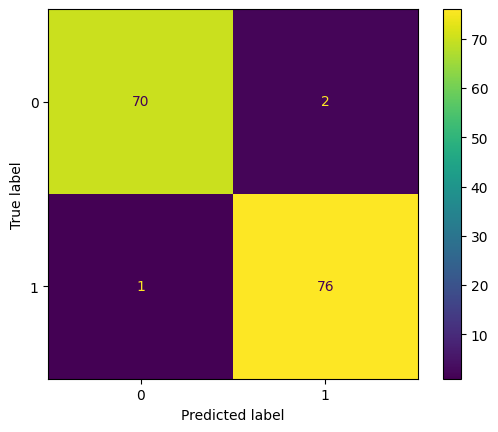

In [32]:
import sklearn.metrics as metrics

cm = metrics.confusion_matrix(acc_test['LyingDown'], acc_test['LyingDown_pred'], labels= logistic_regression.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= logistic_regression.classes_)

disp.plot()

In order to understand and interpret the numbers in the below confusion matrix, it is important to keep the following in mind:

- The upper-left quadrant displays the number of true negatives.
- The bottom-left quadrant displays the number of false negatives.
- The upper-right quadrant displays the number of false positives.
- The bottom-right quadrant displays the number of true positives.


We can define the above bolded terms as follows in our given context:

- True negatives: The number of people that were not lying down that the model accurately predicted were not lying down.
- False negatives: The number of people that were lying down that the model inaccurately predicted were not lying down.
- False positives: The number of people that were not lying down that the model inaccurately predicted were lying down.
- True positives: The number of people that were lying down that the model accurately predicted were lying down.
A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

***

## Logistic Regression Metrics

- Precision
- Recall
- Accuracy

In [33]:
acc_model_precision = metrics.precision_score(acc_test['LyingDown'],acc_test['LyingDown_pred'])

acc_model_precision

0.9743589743589743

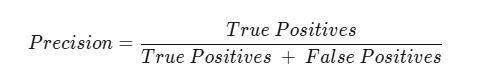

In [34]:
acc_model_recall = metrics.recall_score(acc_test['LyingDown'],acc_test['LyingDown_pred'])
acc_model_recall

0.987012987012987

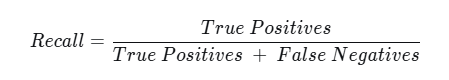

In [35]:
acc_model_accuracy = metrics.accuracy_score(acc_test['LyingDown'],acc_test['LyingDown_pred'])
acc_model_accuracy

0.9798657718120806

***
## ROC Curves
### Receiver Operating Characteristic Curve
An ROC curve helps in visualizing the performance of a logistic regression classifier.

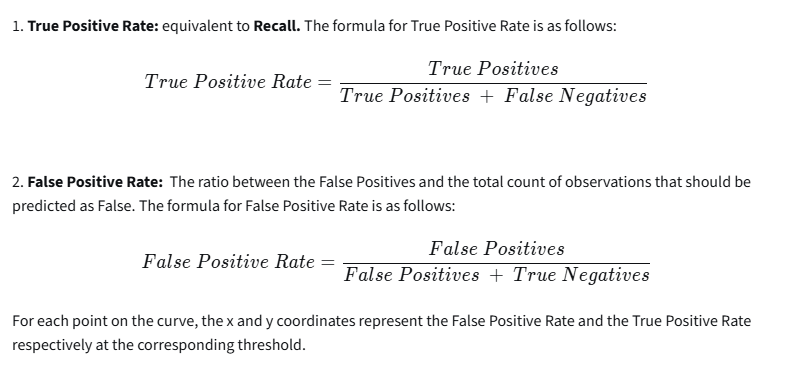

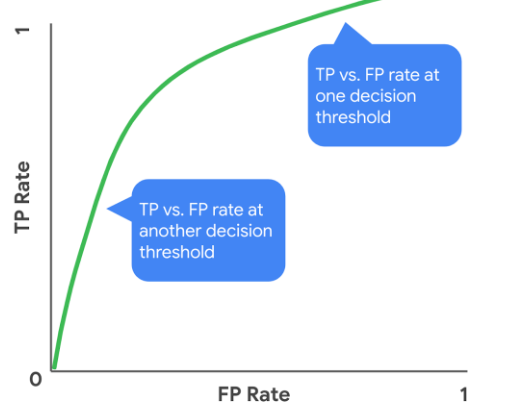

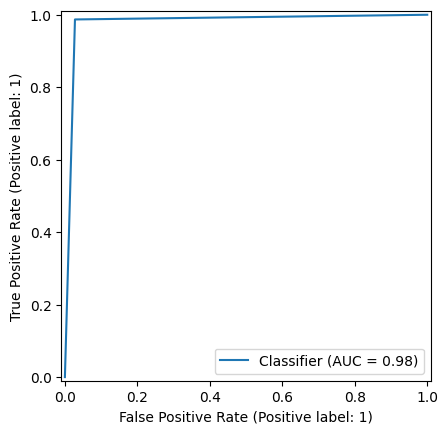

In [36]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(acc_test['LyingDown'],acc_test['LyingDown_pred'])
plt.show()